In [22]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams.update({'font.size': 18})
sns.set_palette("pastel")

In [24]:
df = pd.read_csv('results.csv')
dfold = pd.read_csv('../results-old.csv')

In [25]:
largest_networks = ['Texas84','UF21','Penn94','Indiana69','UIllinois20','Texas80','Michigan23','MSU24','UGA50','FSU53']

In [26]:
df['type'] = 'spark'
dfold['type'] = 'py'
data = pd.concat([df,dfold])

old: 14074.169019999998
new: 4755.093340000001


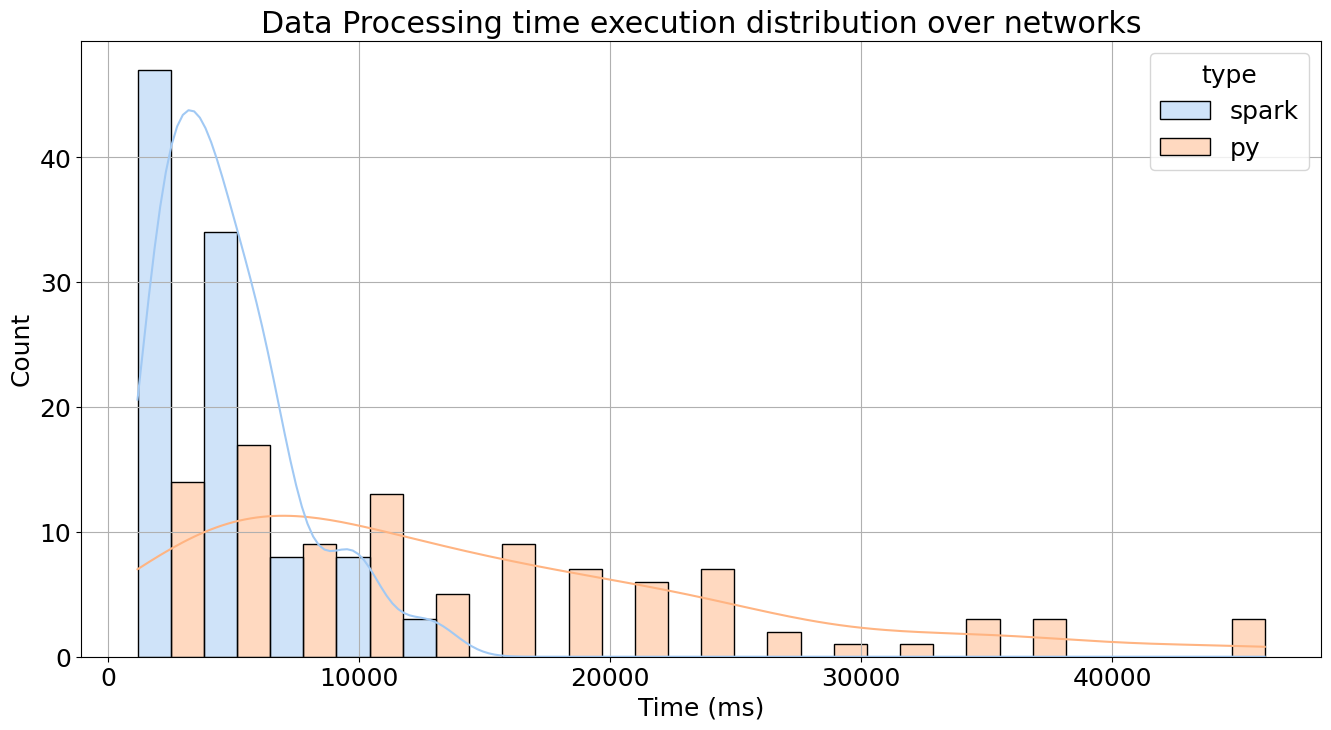

In [27]:
#sns.histplot(df['time'],kde=True,bins=20)
sns.histplot(data=data,x='time',hue='type',multiple="dodge",kde=True)
plt.xlabel('Time (ms)')
plt.title('Data Processing time execution distribution over networks')
plt.grid()
plt.savefig('dist_times.png')
print('old:', np.mean(dfold['time']))
print('new:',np.mean(df['time']))



In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   network     200 non-null    object 
 2   time        200 non-null    float64
 3   type        200 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.8+ KB


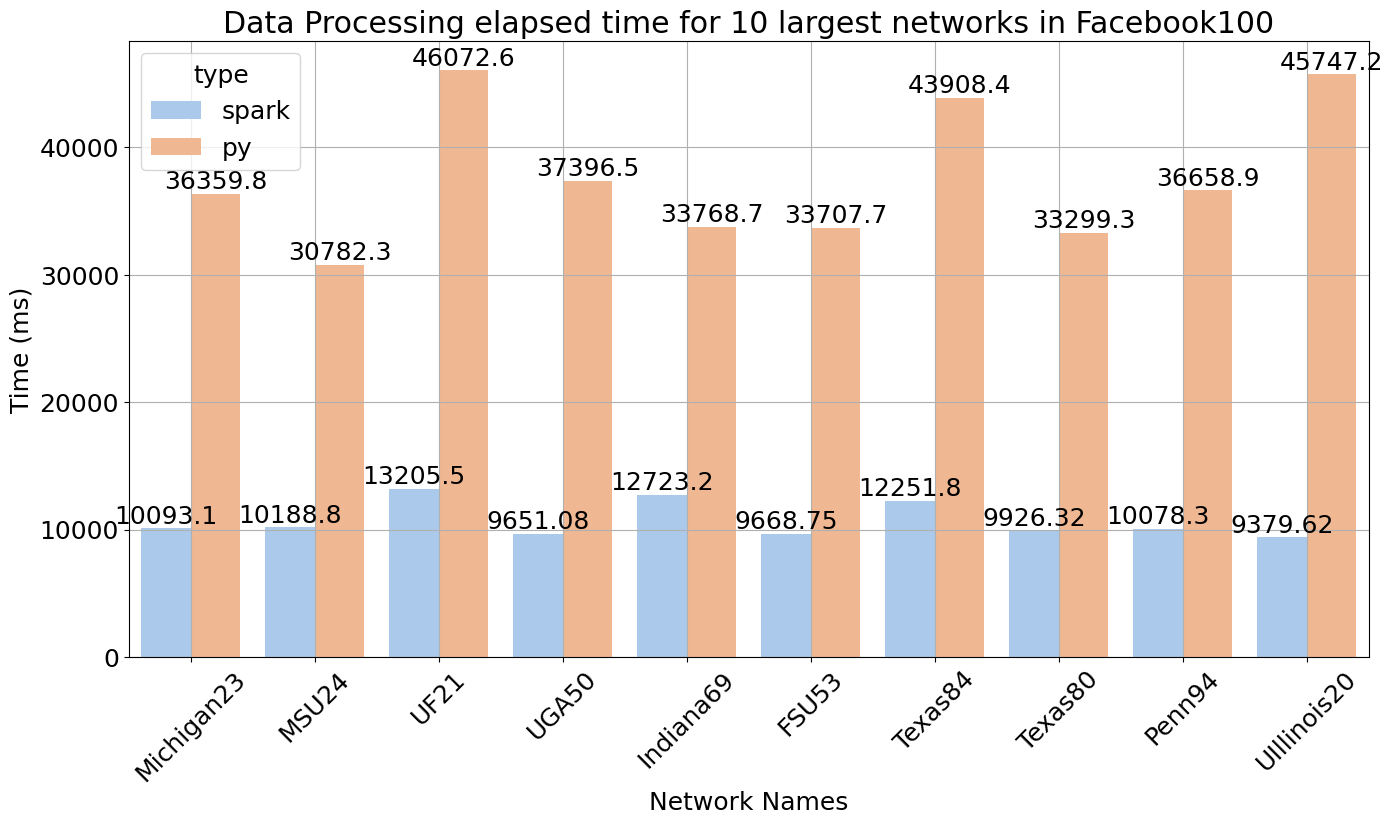

In [29]:
ax = sns.barplot(data=data[data['network'].isin(largest_networks)], x='network',y='time',hue='type')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Network Names')
plt.ylabel('Time (ms)')
plt.title('Data Processing elapsed time for 10 largest networks in Facebook100')
plt.grid()
plt.xticks(rotation=45)
plt.savefig('10_networks_times.png')   